In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'sklearn'

In [12]:
loans = pd.read_csv("Default_fin.csv")
loans.shape

(10000, 5)

In [13]:
loans.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [14]:
# checking for duplicated values and missing values

print(loans.duplicated().any())
print(loans.isnull().sum())

False
Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64


c:\users\rithv\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Defaulted?', ylabel='count'>

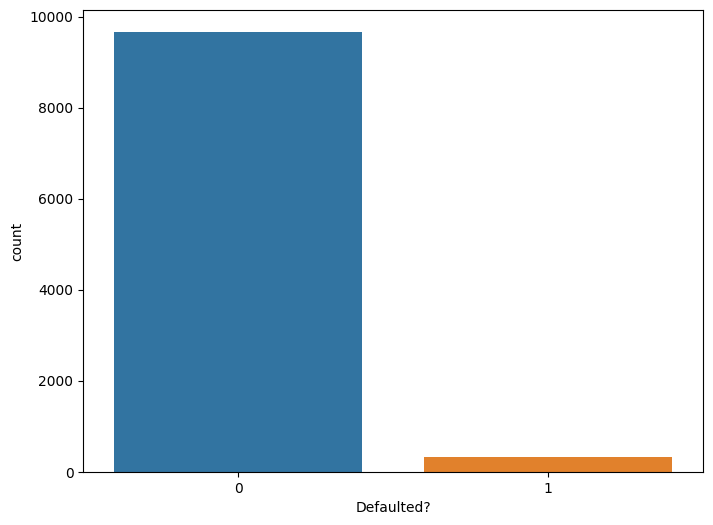

In [16]:
# Since we don't have to add any data we can try visualizing the data now

plt.figure(figsize=(8,6))
sns.countplot(loans['Defaulted?'])

# There obviously seems to be a high proportion of not defaulted cases as opposed to defaulted cases. Therefore, it's important
# evaluate the true neagtive score.




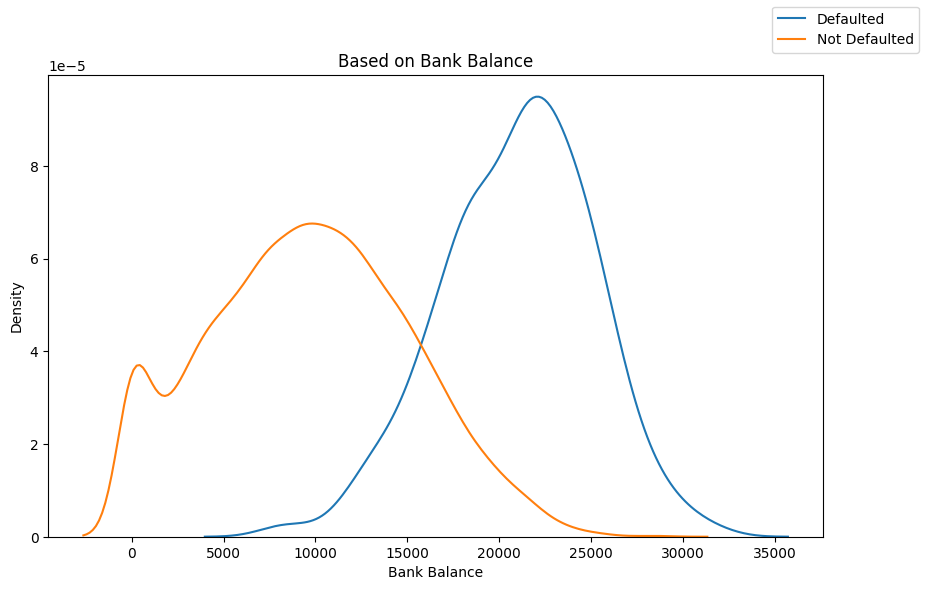

In [18]:
fig = plt.figure(figsize=(10,6))

sns.kdeplot(loans[loans['Defaulted?']==1]['Bank Balance'])
sns.kdeplot(loans[loans['Defaulted?']==0]['Bank Balance'])

fig.legend(labels=['Defaulted', 'Not Defaulted'])
plt.title('Based on Bank Balance')
plt.show()

# Interestingly enough people with a higher bank balance tended to default more

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [26]:
train_cols = ['Employed', 'Bank Balance', 'Annual Salary']
X = loans[train_cols]
y = loans['Defaulted?']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [30]:
log_model = LogisticRegression(class_weight = "balanced") #to help deal witht eh imbalance in data
log_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [35]:
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[958 489]
 [ 12  41]]
              precision    recall  f1-score   support

           0       0.99      0.66      0.79      1447
           1       0.08      0.77      0.14        53

    accuracy                           0.67      1500
   macro avg       0.53      0.72      0.47      1500
weighted avg       0.96      0.67      0.77      1500

